###### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("cpa.csv")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  3


In [6]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
-----------------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
12-08-2013     1
02-03-2013     1
27-11-2012     1
19-09-2012     1
02-10-2012     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [7]:
#Forming New Catagories
Edu={'Basic':'Secondary',
                  '2n Cycle':'Graduation',
                     'Master':'Higher education',
                     'PhD':'Higher education',
                     'Graduation':'Graduation'}
Marital={'Single':'Single',
                     'Alone':'Single',
                     'Widow':'Single',
                     'Divorced':'Single',
                     'Together':'Married',
                     'Married':'Married',
                     'Absurd':'New',
                      'YOLO':'New'}
df['Education']= df['Education'].map(Edu)
df['Marital_Status'] = df['Marital_Status'].map(Marital)

In [8]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation          1330
Higher education     856
Secondary             54
Name: Education, dtype: int64
-----------------------------------------------
Married    1444
Single      792
New           4
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
12-08-2013     1
02-03-2013     1
27-11-2012     1
19-09-2012     1
02-10-2012     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [9]:
# as kidhome and teenhome represents the total children so combining these two columns to reduce columns
tot_children=df['Kidhome']+df['Teenhome']
df['tot_children']=tot_children
df

ID  Year_Birth         Education Marital_Status   Income  Kidhome  \
0      5524        1957        Graduation         Single  58138.0        0   
1      2174        1954        Graduation         Single  46344.0        1   
2      4141        1965        Graduation        Married  71613.0        0   
3      6182        1984        Graduation        Married  26646.0        1   
4      5324        1981  Higher education        Married  58293.0        1   
...     ...         ...               ...            ...      ...      ...   
2235  10870        1967        Graduation        Married  61223.0        0   
2236   4001        1946  Higher education        Married  64014.0        2   
2237   7270        1981        Graduation         Single  56981.0        0   
2238   8235        1956  Higher education        Married  69245.0        0   
2239   9405        1954  Higher education        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   
1            1  08-03-2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0  10-02-2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1  10-06-2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             0   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  tot_children  
0                 3         11         1             0  
1                 3         11         0             2  
2                 3         11         0             0  
3                 3         11         0             1  
4                 3         11         0             1  
...             ...        ...       ...           ...  
2235              3         11         0             1  
2236              3         11         0             3  
2237              3         11         0             0  
2238              3         11         0             1  
2239              3         11         1             2  

[2240 rows x 30 columns]

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
tot_children            0
dtype: int64

In [11]:
#Filling Blank values by NaN
df['Income'] = df['Income'].replace(' ', np.nan)
df

ID  Year_Birth         Education Marital_Status   Income  Kidhome  \
0      5524        1957        Graduation         Single  58138.0        0   
1      2174        1954        Graduation         Single  46344.0        1   
2      4141        1965        Graduation        Married  71613.0        0   
3      6182        1984        Graduation        Married  26646.0        1   
4      5324        1981  Higher education        Married  58293.0        1   
...     ...         ...               ...            ...      ...      ...   
2235  10870        1967        Graduation        Married  61223.0        0   
2236   4001        1946  Higher education        Married  64014.0        2   
2237   7270        1981        Graduation         Single  56981.0        0   
2238   8235        1956  Higher education        Married  69245.0        0   
2239   9405        1954  Higher education        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   
1            1  08-03-2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0  10-02-2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1  10-06-2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             0   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  tot_children  
0                 3         11         1             0  
1                 3         11         0             2  
2                 3         11         0             0  
3                 3         11         0             1  
4                 3         11         0             1  
...             ...        ...       ...           ...  
2235              3         11         0             1  
2236              3         11         0             3  
2237              3         11         0             0  
2238              3         11         0             1  
2239              3         11         1             2  

[2240 rows x 30 columns]

In [12]:
#Dropping two columns as repeteation of information
data=df.copy()
data=data.drop(['Kidhome','Teenhome'],axis=1)
data.head()

ID  Year_Birth         Education Marital_Status   Income Dt_Customer  \
0  5524        1957        Graduation         Single  58138.0  04-09-2012   
1  2174        1954        Graduation         Single  46344.0  08-03-2014   
2  4141        1965        Graduation        Married  71613.0  21-08-2013   
3  6182        1984        Graduation        Married  26646.0  10-02-2014   
4  5324        1981  Higher education        Married  58293.0  19-01-2014   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  \
0       58       635         88              546  ...             0   
1       38        11          1                6  ...             0   
2       26       426         49              127  ...             0   
3       26        11          4               20  ...             0   
4       94       173         43              118  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  tot_children  
0              3         11         1             0  
1              3         11         0             2  
2              3         11         0             0  
3              3         11         0             1  
4              3         11         0             1  

[5 rows x 28 columns]

In [13]:
"""total_purchase=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['tot_purchase']=total_purchase
total_sources=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']
data['tot_sources']=total_sources
total_offer_acce=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
data['total_offer_acce']=total_offer_acce
data"""

"total_purchase=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']\ndata['tot_purchase']=total_purchase\ntotal_sources=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']\ndata['tot_sources']=total_sources\ntotal_offer_acce=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']\ndata['total_offer_acce']=total_offer_acce\ndata"

In [14]:
#clculating age of customer at the time of customer enrollment
data['Dt_Customer'] = data['Dt_Customer'].astype('datetime64')
#data['Date_Customer'] = data['Dt_Customer'].dt.day.astype('int64')
#data['Month_Customer'] = data['Dt_Customer'].dt.month.astype('int64')
data['Year_Customer'] = data['Dt_Customer'].dt.year.astype('int64')
age=data['Year_Customer'] - data['Year_Birth']
data['age']=age
data.head()

ID  Year_Birth         Education Marital_Status   Income Dt_Customer  \
0  5524        1957        Graduation         Single  58138.0  2012-04-09   
1  2174        1954        Graduation         Single  46344.0  2014-08-03   
2  4141        1965        Graduation        Married  71613.0  2013-08-21   
3  6182        1984        Graduation        Married  26646.0  2014-10-02   
4  5324        1981  Higher education        Married  58293.0  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp5  \
0       58       635         88              546  ...             0   
1       38        11          1                6  ...             0   
2       26       426         49              127  ...             0   
3       26        11          4               20  ...             0   
4       94       173         43              118  ...             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   tot_children  Year_Customer  age  
0             0           2012   55  
1             2           2014   60  
2             0           2013   48  
3             1           2014   30  
4             1           2014   33  

[5 rows x 30 columns]

In [15]:
data1=data.drop(['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth'],axis=1)
data1.head()

ID         Education Marital_Status   Income  Recency  MntWines  \
0  5524        Graduation         Single  58138.0       58       635   
1  2174        Graduation         Single  46344.0       38        11   
2  4141        Graduation        Married  71613.0       26       426   
3  6182        Graduation        Married  26646.0       26        11   
4  5324  Higher education        Married  58293.0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         88              546              172                88  ...   
1          1                6                2                 1  ...   
2         49              127              111                21  ...   
3          4               20               10                 3  ...   
4         43              118               46                27  ...   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  tot_children  Year_Customer  age  
0         0         1             0           2012   55  
1         0         0             2           2014   60  
2         0         0             0           2013   48  
3         0         0             1           2014   30  
4         0         0             1           2014   33  

[5 rows x 26 columns]

In [16]:
#Filling NAn values in salary with its median
data1['Income'] = data1['Income'].fillna(data1['Income'].median())
data1.head()

ID         Education Marital_Status   Income  Recency  MntWines  \
0  5524        Graduation         Single  58138.0       58       635   
1  2174        Graduation         Single  46344.0       38        11   
2  4141        Graduation        Married  71613.0       26       426   
3  6182        Graduation        Married  26646.0       26        11   
4  5324  Higher education        Married  58293.0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         88              546              172                88  ...   
1          1                6                2                 1  ...   
2         49              127              111                21  ...   
3          4               20               10                 3  ...   
4         43              118               46                27  ...   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  tot_children  Year_Customer  age  
0         0         1             0           2012   55  
1         0         0             2           2014   60  
2         0         0             0           2013   48  
3         0         0             1           2014   30  
4         0         0             1           2014   33  

[5 rows x 26 columns]

In [17]:
data1.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
tot_children           0
Year_Customer          0
age                    0
dtype: int64

In [18]:
#encoding the levels of categorical feature Education into numeric values.
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data1['Education'] =lblEn.fit_transform(data1['Education'])

In [19]:
#encoding the levels of categorical feature Marital_Status into numeric values.
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data1['Marital_Status'] =lblEn.fit_transform(data1['Marital_Status'])

In [20]:
data1.head()

ID  Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0  5524          0               2  58138.0       58       635         88   
1  2174          0               2  46344.0       38        11          1   
2  4141          0               0  71613.0       26       426         49   
3  6182          0               0  26646.0       26        11          4   
4  5324          1               0  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp3  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   tot_children  Year_Customer  age  
0             0           2012   55  
1             2           2014   60  
2             0           2013   48  
3             1           2014   30  
4             1           2014   33  

[5 rows x 26 columns]

<Figure size 720x720 with 0 Axes>

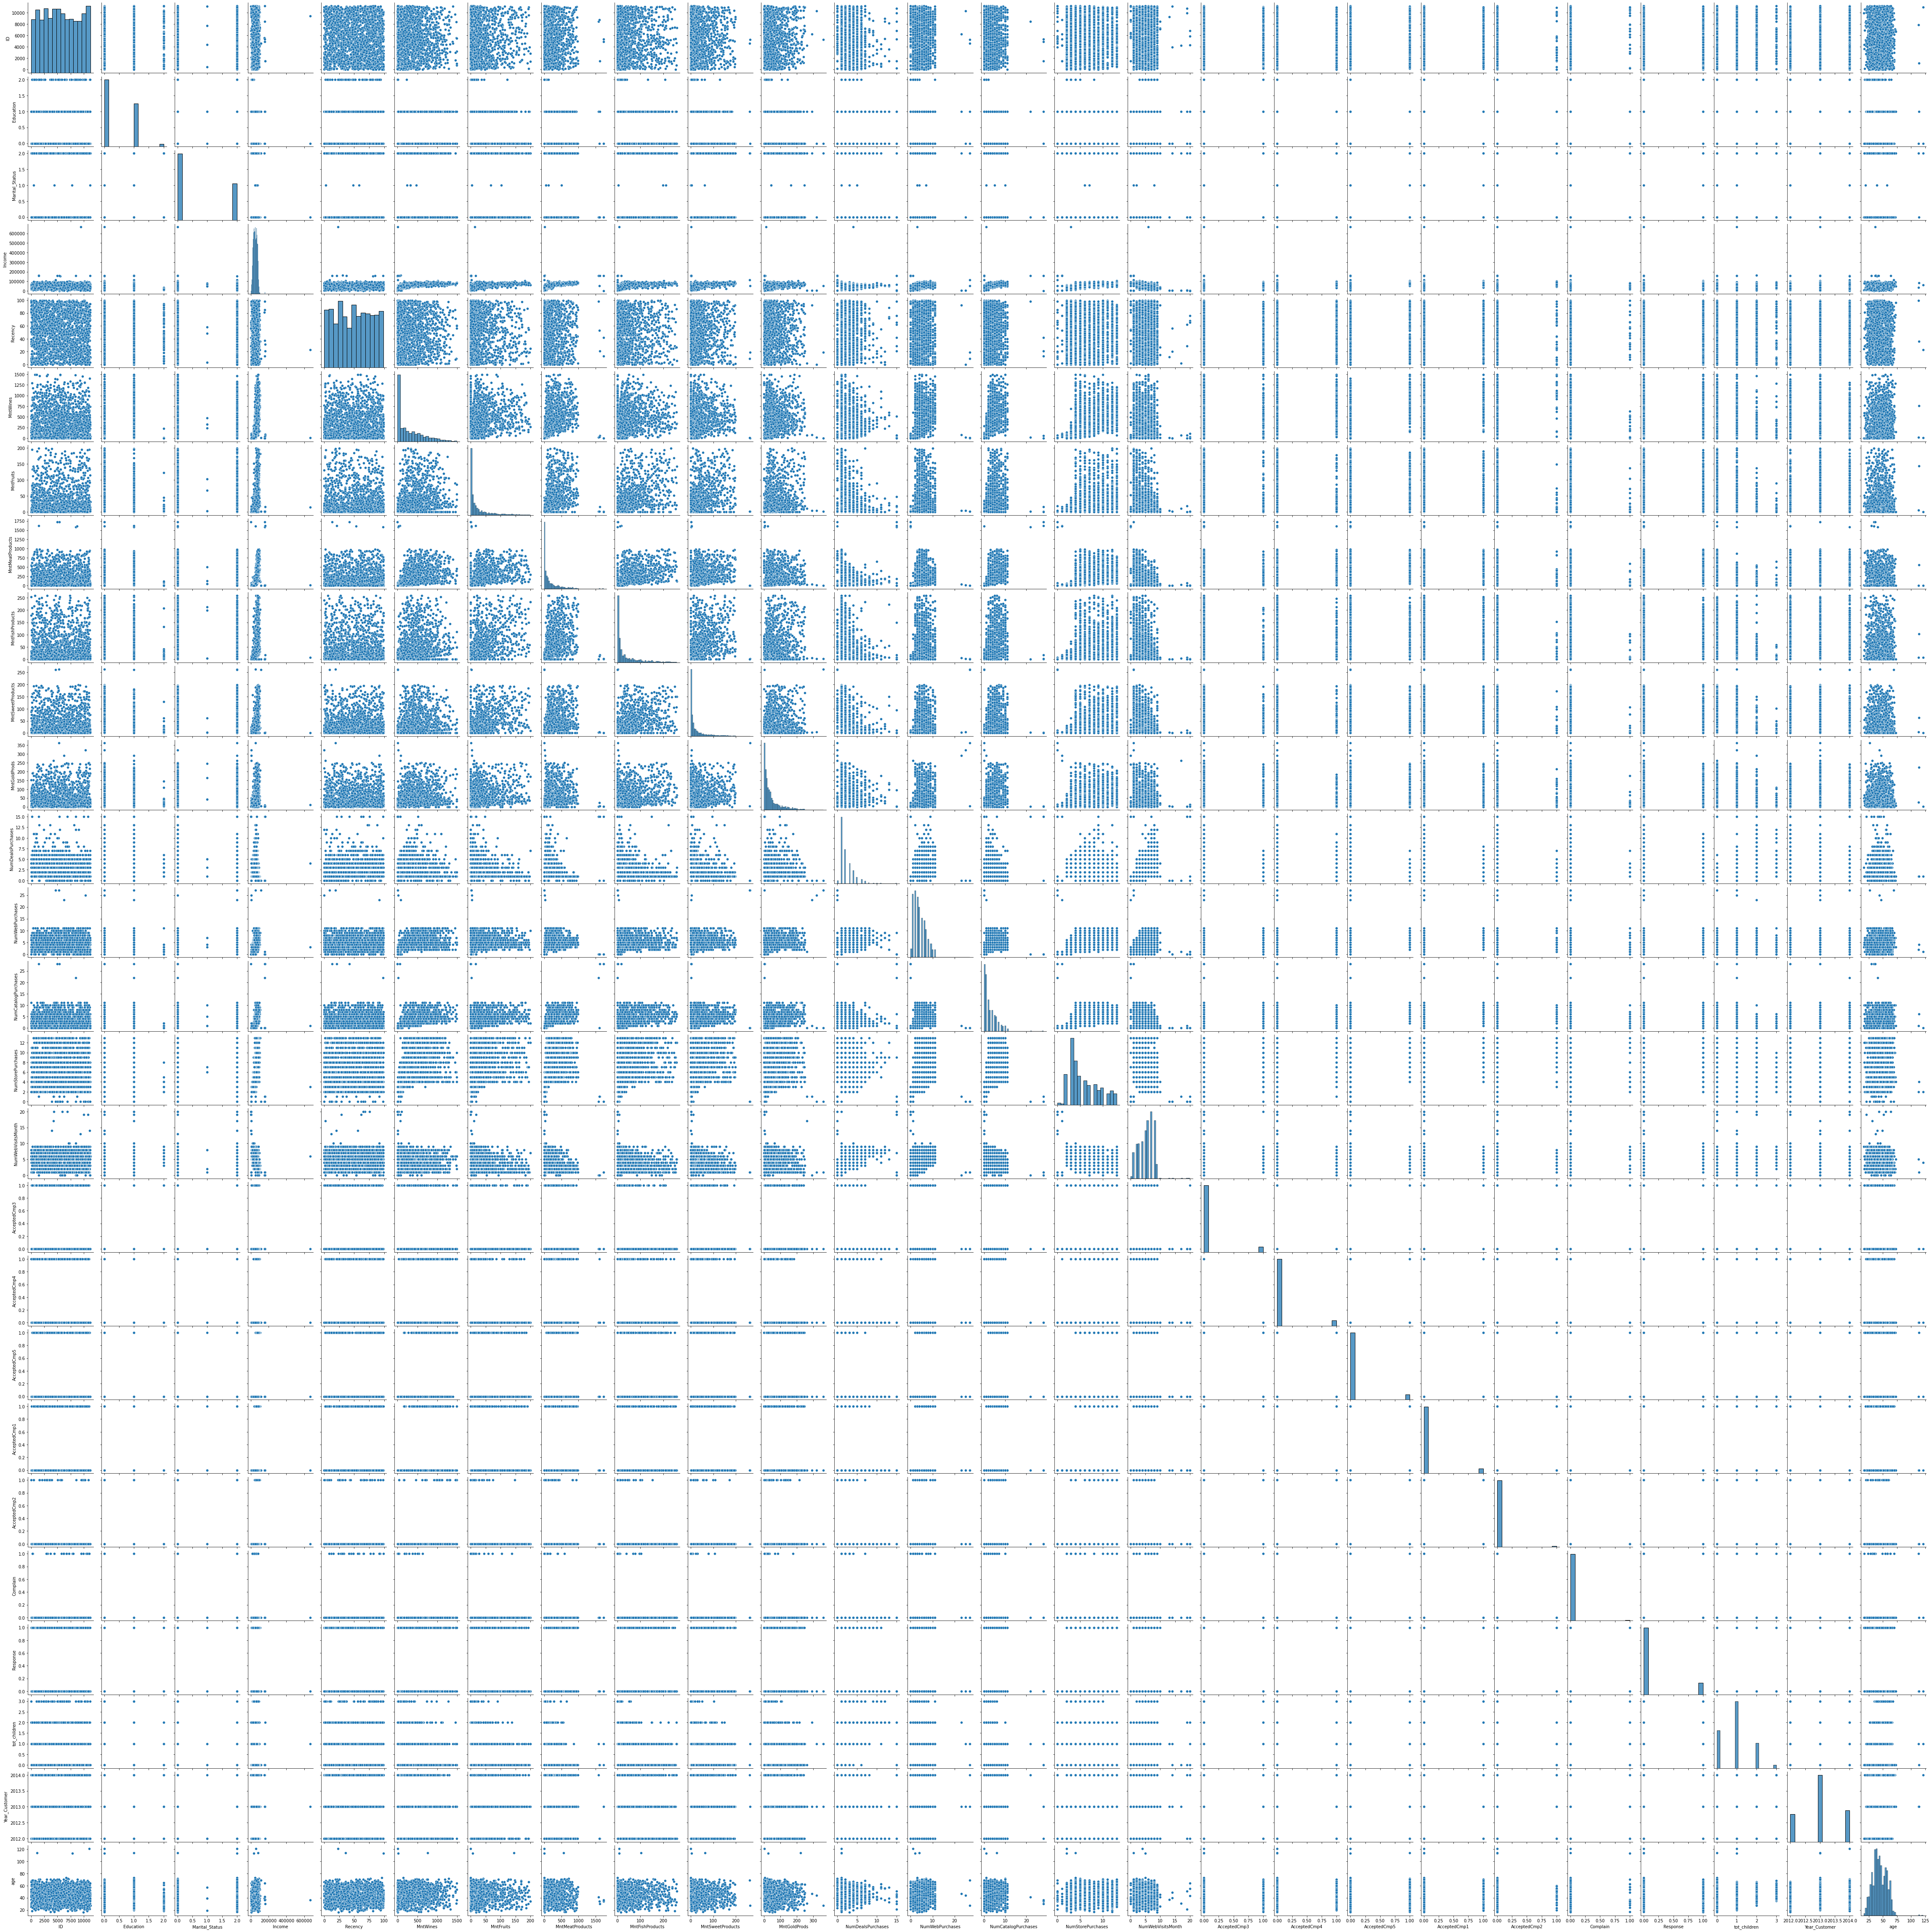

In [26]:
plt.figure(figsize=(10,10),facecolor='white')
sns.pairplot(data1)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

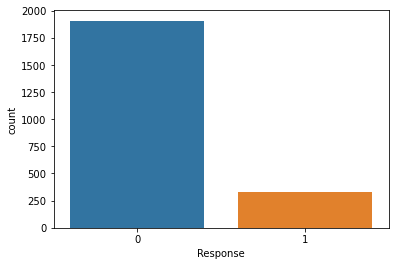

In [27]:
#now let's check distribution of Class attribute
sns.countplot(data1['Response'])

###### which shows imbalanced data at Class attbute so we need to balanced this data using imbalanced-learn.  https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/  from this article i will try for oversampling as using this method no data loss which may be useful. for over-sampling here random over sampling method is used.
One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples.

In [26]:
#Random Over Sampling fo balancing Response data
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# Separate input features and target
y = data1.Response
X = data1.drop('Response', axis=1)

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

rov = RandomOverSampler()
X, y= rov.fit_resample(X,y)

In [27]:
X.shape

(3812, 25)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

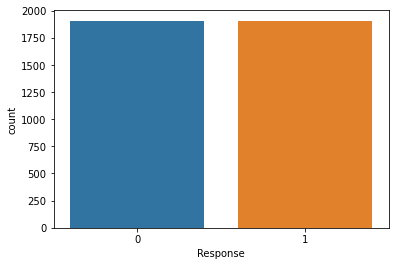

In [28]:
sns.countplot(y)    

###### From above Resampling imbalancingTechnique we get balanced data for Resource Column.

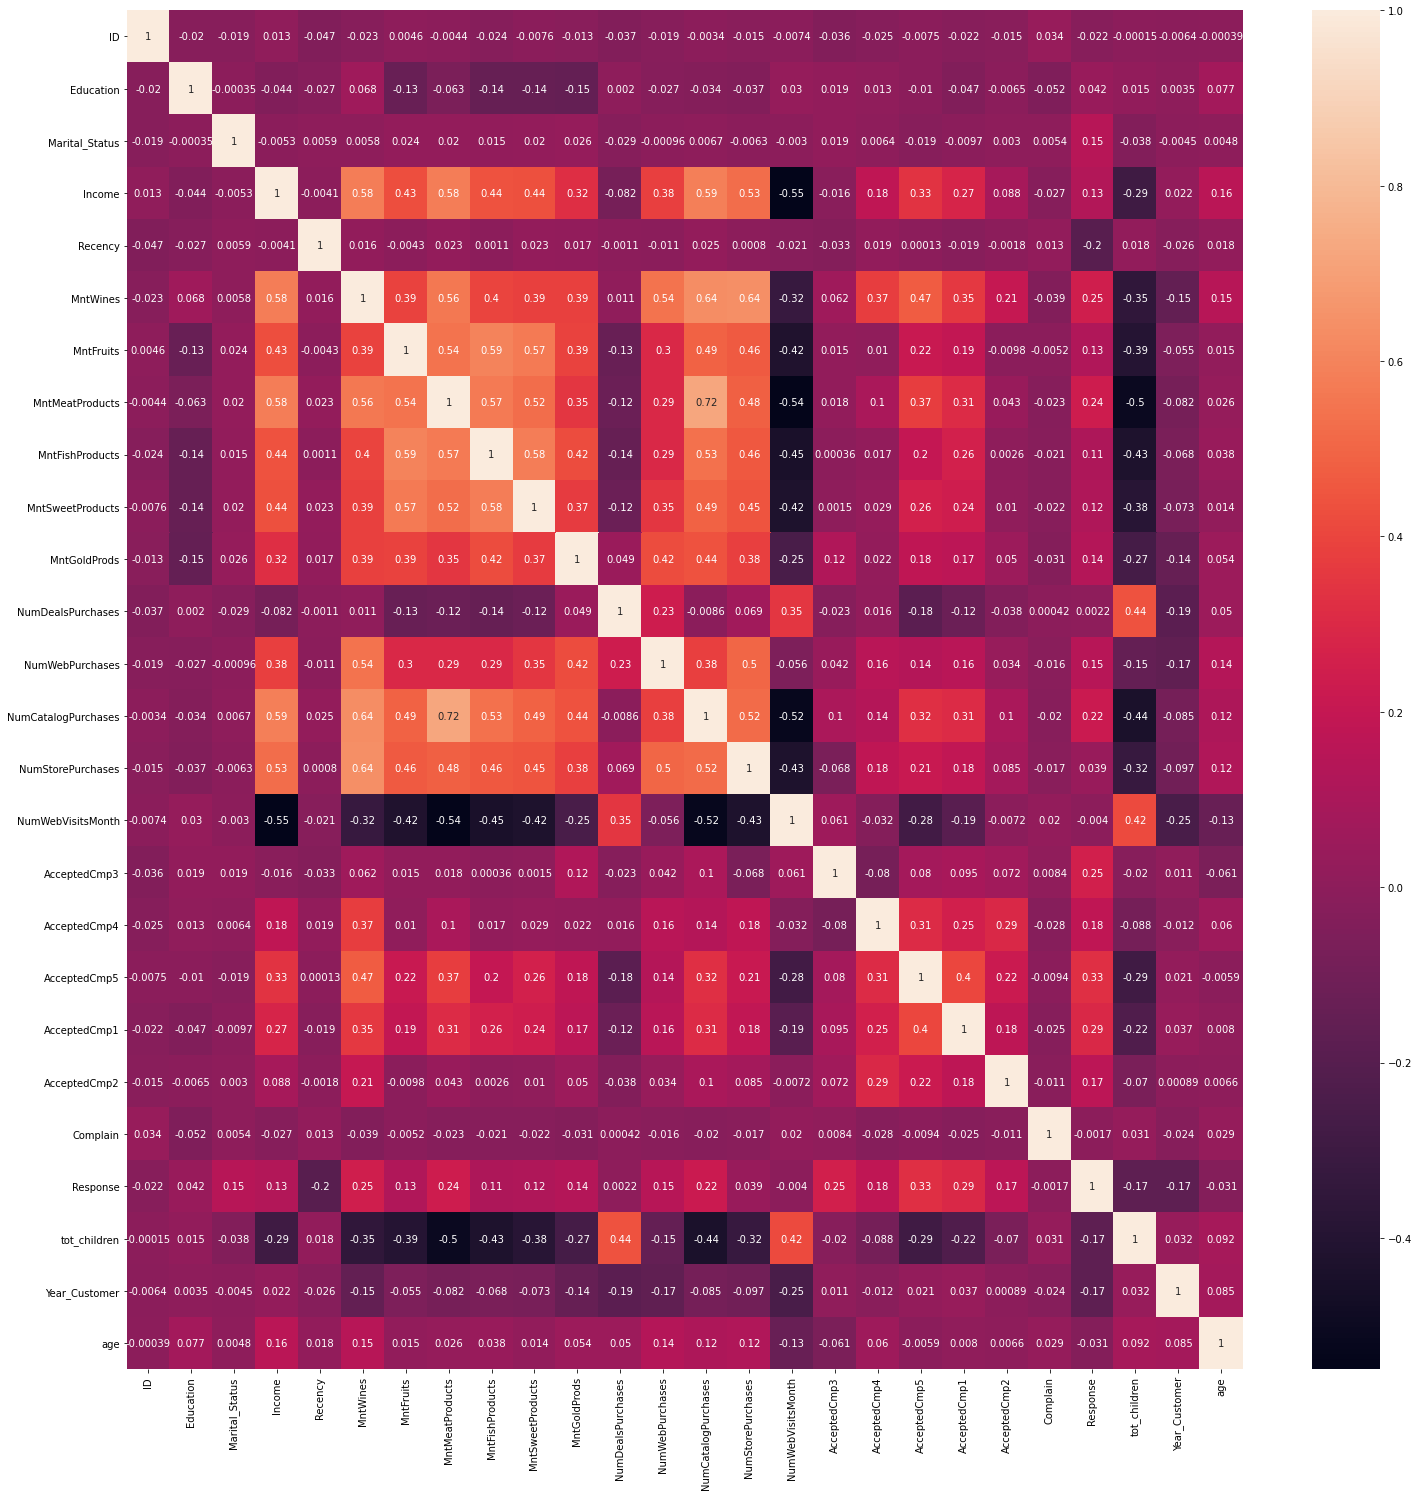

In [30]:
# heatmap for checking corelation between columns
plt.figure(figsize = (25,25))
sns.heatmap(data1.corr(), annot=True)
plt.show()

###### This graph shows that, there is no column (Feature) which is highly co-related with 'Response'. now we can go ahead!!!

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

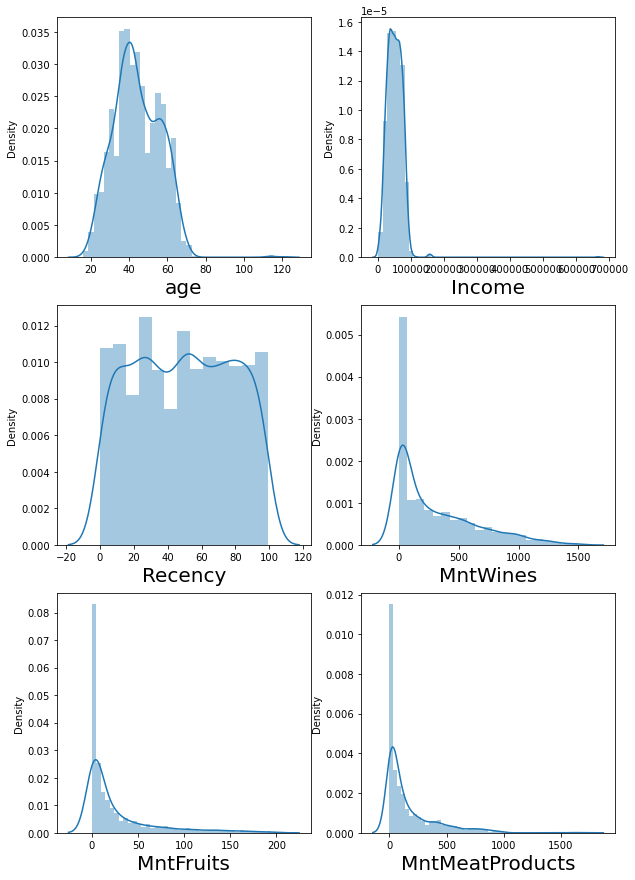

In [29]:
# let's see how data is distributed for continues columns
columns = ['age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()